# STOCK MARKET PRICE PREDICTION USING LSTM

In [1]:
#import System Parameters and function
import sys
print (sys.version)
print(sys.executable)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
C:\Users\akash\anaconda3\python.exe


## 1.Federal Bank

### Importing Libraries

In [2]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

from sklearn import linear_model
from keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit


Using TensorFlow backend.


### Reading Data using Parse Date
#### As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [3]:
df_final = pd.read_csv("D://Dataset//FEDERALBNK.BO.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,23.770000,23.795,23.379999,23.580000,8.429377,724800
2010-01-05,23.900000,24.170,23.650000,23.920000,8.550918,1556550
2010-01-06,24.190001,24.650,24.100000,24.379999,8.715360,1034000
2010-01-07,24.610001,24.990,24.405001,24.565001,8.781491,1360420
2010-01-08,24.790001,25.100,24.605000,24.760000,8.851200,1886220


In [4]:
df_final.shape

(2461, 6)

In [5]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2.461000e+03
mean,62.520234,63.378297,61.410343,62.334283,53.904860,8.685913e+05
std,25.137545,25.379739,24.740983,25.024562,31.001343,3.296248e+06
min,22.980000,23.795000,22.125000,22.985001,8.429377,0.000000e+00
25%,41.599998,42.189999,40.810001,41.540001,23.829430,2.492700e+05
50%,57.049999,57.700001,56.125000,56.900002,53.904865,4.372800e+05
75%,82.500000,83.650002,80.949997,82.349998,80.690247,8.076870e+05
max,126.699997,127.750000,125.650002,126.300003,123.230705,1.122362e+08


In [6]:
df_final.isnull().values.any()

False

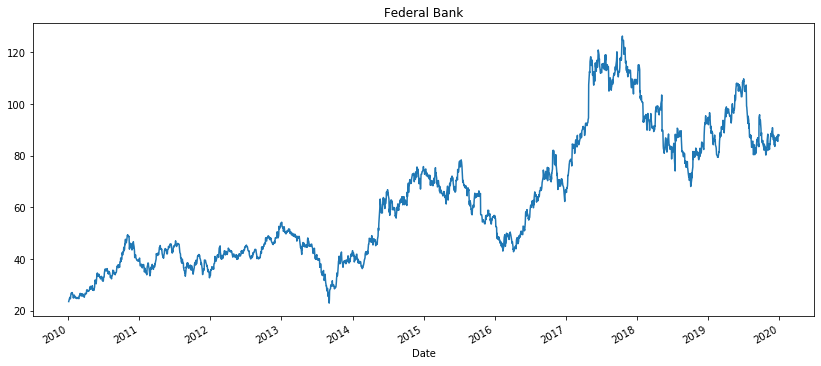

In [7]:
df_final['Close'].plot(figsize=(14,6), title = 'Federal Bank')

### Correlation Analysis

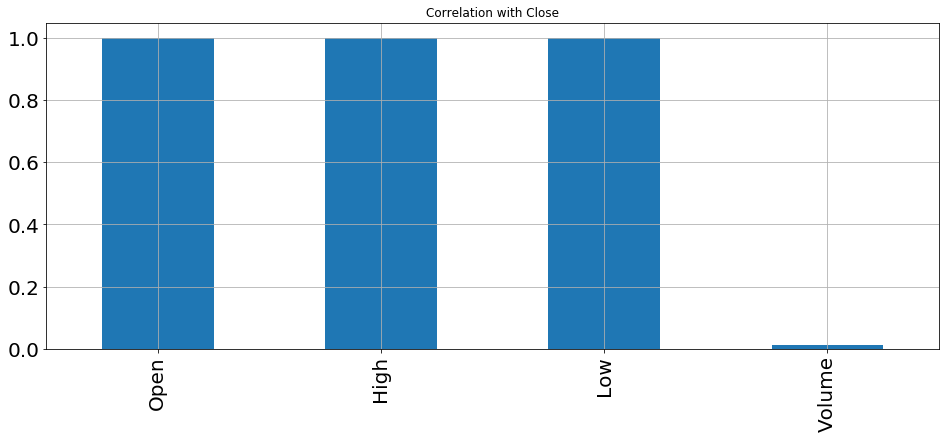

In [8]:
#Correlation Analysis
X=df_final.drop(['Close'],axis=1)
X=X.drop(['Adj Close'],axis=1)

X.corrwith(df_final['Close']).plot.bar(
        figsize = (16, 6), title = "Correlation with Close", fontsize = 20,
        rot = 90, grid = True)

In [9]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,23.770000,23.795,23.379999,23.580000,8.429377,724800
2010-01-05,23.900000,24.170,23.650000,23.920000,8.550918,1556550
2010-01-06,24.190001,24.650,24.100000,24.379999,8.715360,1034000
2010-01-07,24.610001,24.990,24.405001,24.565001,8.781491,1360420
2010-01-08,24.790001,25.100,24.605000,24.760000,8.851200,1886220


In [10]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

### Normalizing of Data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-01-04,0.007617,0.000000,0.012123,0.006458
2010-01-05,0.008870,0.003607,0.014731,0.013869
2010-01-06,0.011666,0.008225,0.019078,0.009213
2010-01-07,0.015715,0.011495,0.022024,0.012121
2010-01-08,0.017451,0.012554,0.023956,0.016806


In [12]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())


,Open,High,Low,Volume
Date,,,,
2010-01-04,0.007617,0.000000,0.012123,0.006458
2010-01-05,0.008870,0.003607,0.014731,0.013869
2010-01-06,0.011666,0.008225,0.019078,0.009213
2010-01-07,0.015715,0.011495,0.022024,0.012121
2010-01-08,0.017451,0.012554,0.023956,0.016806


Shape of features :  (2461, 4)
Shape of target :  (2461, 1)


,Open,High,Low,Volume
Date,,,,
2019-12-23,0.622059,0.612813,0.612171,0.002309
2019-12-24,0.611454,0.603194,0.612171,0.001149
2019-12-26,0.604223,0.598384,0.609273,0.001242
2019-12-27,0.609044,0.623876,0.613620,0.003350
2019-12-30,0.625916,0.626281,0.628109,0.002712


,Close
Date,
2019-12-23,85.650002
2019-12-24,85.550003
2019-12-26,88.199997
2019-12-27,87.599998
2019-12-30,88.050003



 -----After process------ 

Shape of features :  (2371, 4)
Shape of target :  (2371, 1)


,Close
Date,
2019-08-07,87.349998
2019-08-08,87.900002
2019-08-09,83.250000
2019-08-13,84.449997
2019-08-14,85.250000


### Train Test Split Using Time Series

In [13]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [14]:
X_train.shape

(2156, 4)

In [15]:
X_test.shape

(215, 4)

In [16]:
y_train.shape

(2156,)

In [17]:
y_test.shape

(215,)

In [18]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

### BenchMark Model

RMSE:  3.1866692133420957
R2 score:  0.05098331945275958


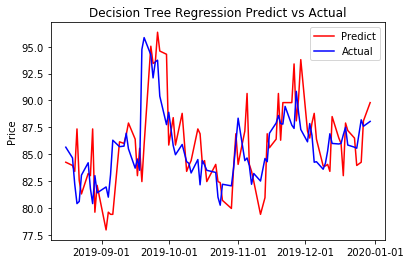

In [19]:

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

### LSTM Model

In [20]:
#Processing the data for LSTM
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
2156/2156 [==============================] - 1s 521us/step - loss: 3746.6759
Epoch 2/200
2156/2156 [==============================] - 1s 252us/step - loss: 3052.2099
Epoch 3/200
2156/2156 [==============================] - 1s 250us/step - loss: 2072.7809
Epoch 4/200
2156/2156 [==============================] - 1s 252us/step - loss: 1134.8119
Epoch 5/200
2156/2156 [==============================] - 1s 253us/step - loss: 477.4357
Epoch 6/200
2156/2156 [==============================] - 1s 258us/step - loss: 147.2306
Epoch 7/200
2156/2156 [==============================] - 1s 256us/step - loss: 34.6430
Epoch 8/200
2156/2156 [==============================] - 1s 251us/step - loss: 10.3671
Epoch 9/200
2156/2156 [==============================] - 1s 256us/step - loss: 7.1870
Epoch 10/200
2156/2156 [==============================] - 1s 257us/step - loss: 6.5557
Epoch 11/200
2156/2156 [==============================] - 1s 259us/step - loss: 5.8945
Epoch 12/200
2156/2156 [==========

### Prediction by LSTM

In [22]:
#Evaluation of model
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.995
The R2 score on the Test set is:	0.952


In [23]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

215/215 [==============================] - 0s 1ms/step


In [24]:
print('LSTM: %f'%score_lstm)

LSTM: 4.617421


In [25]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

### Prediction Visualization

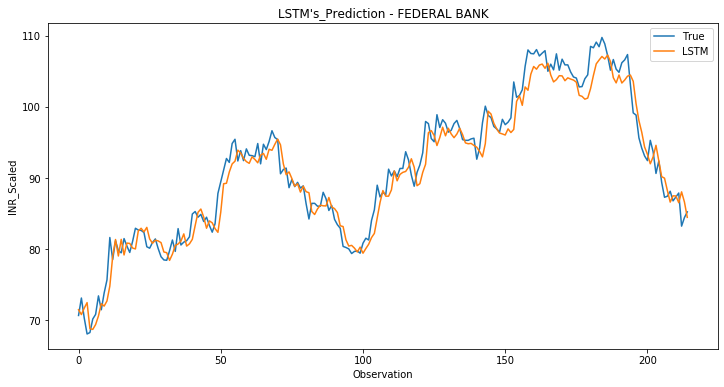

In [26]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction - FEDERAL BANK")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [27]:
col1 = pd.DataFrame(y_test, columns=['Actual Value'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM Prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.head(5)

,Actual Value,LSTM Prediction,Loss_LSTM
0,70.699997,71.504051,3746.675948
1,73.150002,70.826881,3052.209921
2,70.349998,71.731216,2072.780861
3,68.099998,72.506989,1134.811859
4,68.300003,68.851364,477.435685


In [28]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_test_LSTM ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_LSTM )))

Mean Absolute Error: 1.6601219709529436
Mean Squared Error: 4.617420931641814
Root Mean Squared Error: 2.148818496672489


## 2. ICICI Bank

In [29]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

from sklearn import linear_model
from keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

In [30]:
df_final = pd.read_csv("D://Dataset//ICICIBANK.BO.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,161.455002,163.608994,159.218002,159.800003,85.270287,1924434
2010-01-05,162.000000,162.526993,160.455002,161.373001,86.109665,2999596
2010-01-06,162.509003,164.964005,161.817993,162.755005,86.847115,4112664
2010-01-07,162.718002,162.727005,159.455002,160.955002,85.886604,1834883
2010-01-08,161.455002,161.817993,158.190994,158.873001,84.775642,2535022


In [31]:
df_final.shape

(2461, 6)

In [32]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2.461000e+03
mean,247.934715,251.012571,244.560710,247.705634,214.942507,1.877133e+06
std,80.193780,80.972920,79.412605,80.226366,102.383504,1.647837e+06
min,120.199997,121.754997,116.544998,118.617996,74.039291,0.000000e+00
25%,187.272995,189.636002,184.544998,186.873001,120.042007,8.134760e+05
50%,230.908997,233.636002,227.509003,230.772995,216.696014,1.418901e+06
75%,292.549988,294.899994,288.799988,291.700012,282.166534,2.453744e+06
max,549.400024,552.400024,542.799988,549.400024,549.400024,3.099254e+07


In [33]:
df_final.isnull().values.any()

False

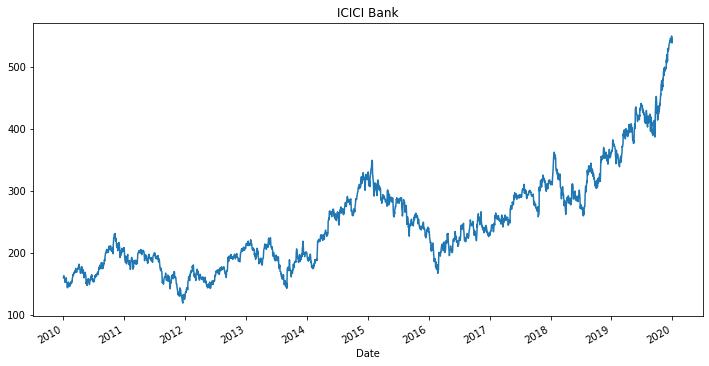

In [34]:
df_final['Close'].plot(figsize=(12,6), title = 'ICICI Bank')

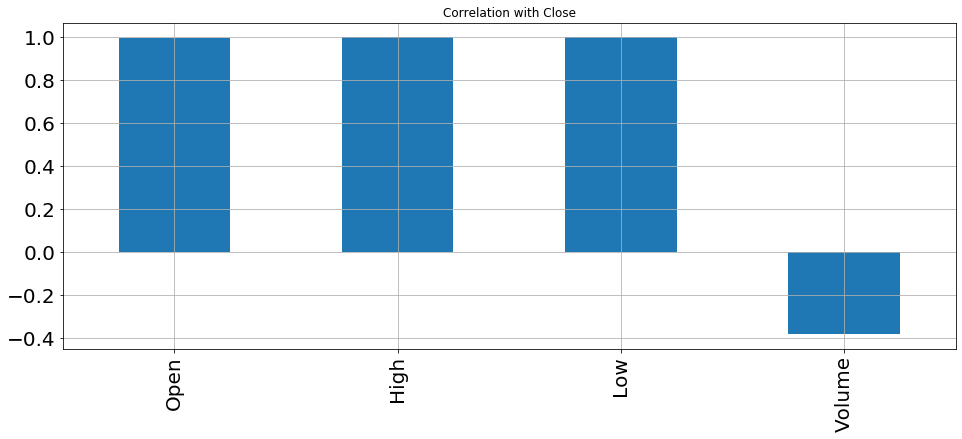

In [35]:
X=df_final.drop(['Close'],axis=1)
X=X.drop(['Adj Close'],axis=1)

X.corrwith(df_final['Close']).plot.bar(
        figsize = (16, 6), title = "Correlation with Close", fontsize = 20,
        rot = 90, grid = True)

In [36]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,161.455002,163.608994,159.218002,159.800003,85.270287,1924434
2010-01-05,162.000000,162.526993,160.455002,161.373001,86.109665,2999596
2010-01-06,162.509003,164.964005,161.817993,162.755005,86.847115,4112664
2010-01-07,162.718002,162.727005,159.455002,160.955002,85.886604,1834883
2010-01-08,161.455002,161.817993,158.190994,158.873001,84.775642,2535022


In [37]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-01-04,0.096121,0.097189,0.100111,0.062093
2010-01-05,0.097390,0.094677,0.103013,0.096784
2010-01-06,0.098576,0.100336,0.106211,0.132699
2010-01-07,0.099063,0.095141,0.100667,0.059204
2010-01-08,0.096121,0.093030,0.097702,0.081795


In [39]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())


,Open,High,Low,Volume
Date,,,,
2010-01-04,0.096121,0.097189,0.100111,0.062093
2010-01-05,0.097390,0.094677,0.103013,0.096784
2010-01-06,0.098576,0.100336,0.106211,0.132699
2010-01-07,0.099063,0.095141,0.100667,0.059204
2010-01-08,0.096121,0.093030,0.097702,0.081795


Shape of features :  (2461, 4)
Shape of target :  (2461, 1)


,Open,High,Low,Volume
Date,,,,
2019-12-23,0.992078,0.992105,0.988153,0.010291
2019-12-24,0.982060,0.979798,0.992258,0.006090
2019-12-26,0.981594,0.976547,0.988035,0.009785
2019-12-27,0.978099,0.995588,0.989443,0.031299
2019-12-30,1.000000,1.000000,1.000000,0.012090


,Close
Date,
2019-12-23,541.049988
2019-12-24,539.000000
2019-12-26,549.400024
2019-12-27,543.950012
2019-12-30,538.750000



 -----After process------ 

Shape of features :  (2371, 4)
Shape of target :  (2371, 1)


,Close
Date,
2019-08-07,414.600006
2019-08-08,420.399994
2019-08-09,410.500000
2019-08-13,417.350006
2019-08-14,419.149994


In [40]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [41]:
X_train.shape

(2156, 4)

In [42]:
X_test.shape

(215, 4)

In [43]:
y_train.shape

(2156,)

In [44]:
y_test.shape

(215,)

In [45]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  120.06321393287223
R2 score:  -4.543940914485525


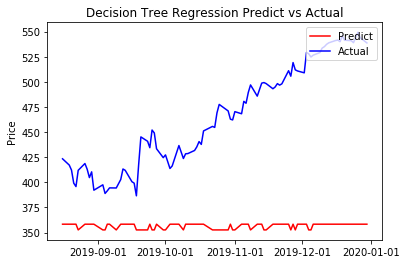

In [46]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [47]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [48]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
2156/2156 [==============================] - 1s 470us/step - loss: 53305.6743
Epoch 2/200
2156/2156 [==============================] - 1s 260us/step - loss: 50825.7300
Epoch 3/200
2156/2156 [==============================] - 1s 274us/step - loss: 45621.2651
Epoch 4/200
2156/2156 [==============================] - 1s 269us/step - loss: 38544.5466
Epoch 5/200
2156/2156 [==============================] - 1s 255us/step - loss: 30825.5082
Epoch 6/200
2156/2156 [==============================] - 1s 274us/step - loss: 23349.9276
Epoch 7/200
2156/2156 [==============================] - 1s 285us/step - loss: 16684.0449
Epoch 8/200
2156/2156 [==============================] - 1s 298us/step - loss: 11160.2752
Epoch 9/200
2156/2156 [==============================] - 1s 264us/step - loss: 6919.2737
Epoch 10/200
2156/2156 [==============================] - 1s 257us/step - loss: 3933.7728
Epoch 11/200
2156/2156 [==============================] - 1s 254us/step - loss: 2037.8451
Epoch 12/20

2156/2156 [==============================] - 1s 266us/step - loss: 27.8376
Epoch 94/200
2156/2156 [==============================] - 1s 268us/step - loss: 27.8285
Epoch 95/200
2156/2156 [==============================] - 1s 269us/step - loss: 27.8196
Epoch 96/200
2156/2156 [==============================] - 1s 278us/step - loss: 27.8108
Epoch 97/200
2156/2156 [==============================] - 1s 273us/step - loss: 27.8022
Epoch 98/200
2156/2156 [==============================] - 1s 266us/step - loss: 27.7938
Epoch 99/200
2156/2156 [==============================] - 1s 276us/step - loss: 27.7855
Epoch 100/200
2156/2156 [==============================] - 1s 279us/step - loss: 27.7773
Epoch 101/200
2156/2156 [==============================] - 1s 262us/step - loss: 27.7693
Epoch 102/200
2156/2156 [==============================] - 1s 278us/step - loss: 27.7614
Epoch 103/200
2156/2156 [==============================] - 1s 261us/step - loss: 27.7536
Epoch 104/200
2156/2156 [================

2156/2156 [==============================] - 1s 270us/step - loss: 27.3069
Epoch 186/200
2156/2156 [==============================] - 1s 267us/step - loss: 27.3025
Epoch 187/200
2156/2156 [==============================] - 1s 269us/step - loss: 27.2980
Epoch 188/200
2156/2156 [==============================] - 1s 271us/step - loss: 27.2936
Epoch 189/200
2156/2156 [==============================] - 1s 271us/step - loss: 27.2892
Epoch 190/200
2156/2156 [==============================] - 1s 271us/step - loss: 27.2848
Epoch 191/200
2156/2156 [==============================] - 1s 290us/step - loss: 27.2804
Epoch 192/200
2156/2156 [==============================] - 1s 275us/step - loss: 27.2760
Epoch 193/200
2156/2156 [==============================] - 1s 286us/step - loss: 27.2716
Epoch 194/200
2156/2156 [==============================] - 1s 280us/step - loss: 27.2672
Epoch 195/200
2156/2156 [==============================] - 1s 282us/step - loss: 27.2628
Epoch 196/200
2156/2156 [==========

In [49]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.990
The R2 score on the Test set is:	0.951


In [50]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

215/215 [==============================] - 0s 1ms/step


In [51]:
print('LSTM: %f'%score_lstm)

LSTM: 59.121219


In [52]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

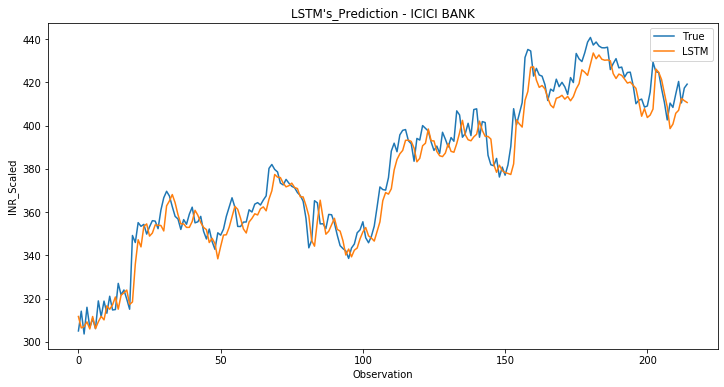

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction - ICICI BANK")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [54]:
col1 = pd.DataFrame(y_test, columns=['Actual Value'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM Prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.head(5)

,Actual Value,LSTM Prediction,Loss_LSTM
0,305.000000,311.679779,53305.674281
1,314.149994,306.399109,50825.729951
2,303.600006,307.047577,45621.265129
3,315.950012,309.197998,38544.546574
4,306.600006,305.922241,30825.508164


In [55]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_test_LSTM ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_LSTM )))

Mean Absolute Error: 5.985877600381545
Mean Squared Error: 59.12123383656153
Root Mean Squared Error: 7.689033348644128


#### In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors. The MSE is a measure of the quality of an estimator. it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.
#### Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily close price in the test set within portion of the real close price.

## 3.Canara Bank 

In [56]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

from sklearn import linear_model
from keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit


In [57]:
df_final = pd.read_csv("D://Dataset//CANBK.BO.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,381.289001,388.097992,376.765991,387.076996,321.910095,58279
2010-01-05,390.286011,395.878998,389.071014,394.712006,328.259674,95281
2010-01-06,394.907013,400.354004,389.071014,396.268005,329.553772,68622
2010-01-07,396.851990,401.229004,394.954987,399.964996,332.628326,66019
2010-01-08,402.687988,402.687988,390.092010,393.106995,326.924927,41554


In [58]:
df_final.shape

(2461, 6)

In [59]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2.461000e+03
mean,349.864919,355.878554,343.054301,349.205081,324.027831,2.439746e+05
std,114.224656,116.062034,112.168360,114.195294,89.505916,2.340062e+05
min,154.072006,159.518997,151.932007,154.218002,153.784561,0.000000e+00
25%,261.549988,265.549988,255.500000,260.299988,257.471313,8.156100e+04
50%,342.187988,347.975006,336.000000,340.500000,319.472137,1.864270e+05
75%,416.062012,422.481995,407.114014,415.625000,376.086304,3.274320e+05
max,813.158020,820.939026,790.981018,813.012024,692.660645,2.654966e+06


In [60]:
df_final.isnull().values.any()

False

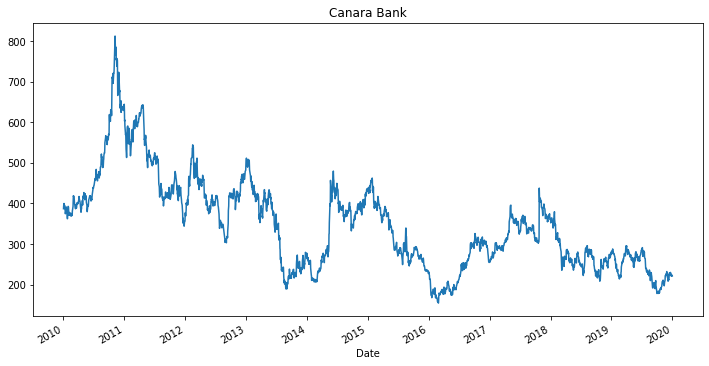

In [61]:
df_final['Close'].plot(figsize=(12,6), title = 'Canara Bank')

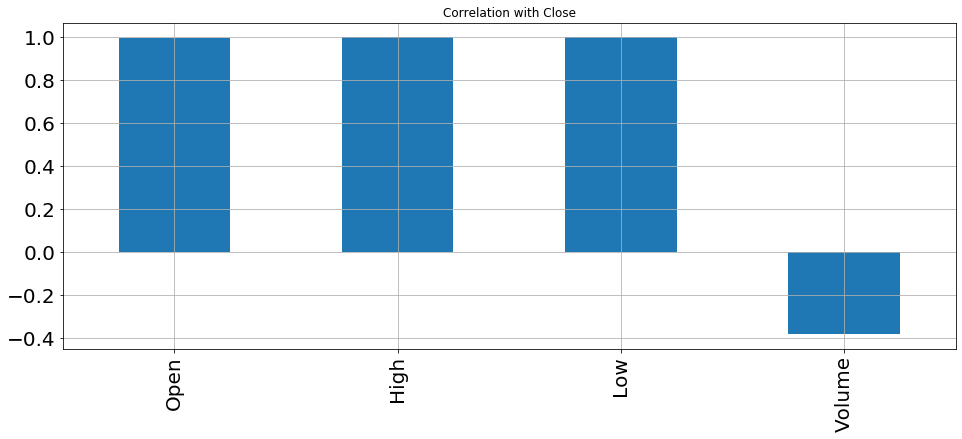

In [62]:
X=df_final.drop(['Close'],axis=1)
X=X.drop(['Adj Close'],axis=1)

X.corrwith(df_final['Close']).plot.bar(
        figsize = (16, 6), title = "Correlation with Close", fontsize = 20,
        rot = 90, grid = True)

In [63]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,381.289001,388.097992,376.765991,387.076996,321.910095,58279
2010-01-05,390.286011,395.878998,389.071014,394.712006,328.259674,95281
2010-01-06,394.907013,400.354004,389.071014,396.268005,329.553772,68622
2010-01-07,396.851990,401.229004,394.954987,399.964996,332.628326,66019
2010-01-08,402.687988,402.687988,390.092010,393.106995,326.924927,41554


In [64]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-01-04,0.344746,0.345588,0.351826,0.021951
2010-01-05,0.358396,0.357352,0.371081,0.035888
2010-01-06,0.365408,0.364118,0.371081,0.025847
2010-01-07,0.368359,0.365441,0.380288,0.024866
2010-01-08,0.377213,0.367647,0.372679,0.015651


In [66]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2010-01-04,0.344746,0.345588,0.351826,0.021951
2010-01-05,0.358396,0.357352,0.371081,0.035888
2010-01-06,0.365408,0.364118,0.371081,0.025847
2010-01-07,0.368359,0.365441,0.380288,0.024866
2010-01-08,0.377213,0.367647,0.372679,0.015651


Shape of features :  (2461, 4)
Shape of target :  (2461, 1)


,Open,High,Low,Volume
Date,,,,
2019-12-23,0.115202,0.110945,0.113400,0.090211
2019-12-24,0.109967,0.103310,0.113947,0.058247
2019-12-26,0.107767,0.099454,0.106045,0.082299
2019-12-27,0.105947,0.104066,0.110192,0.134937
2019-12-30,0.106554,0.098925,0.106593,0.059958


,Close
Date,
2019-12-23,225.800003
2019-12-24,220.300003
2019-12-26,224.199997
2019-12-27,221.699997
2019-12-30,221.300003



 -----After process------ 

Shape of features :  (2371, 4)
Shape of target :  (2371, 1)


,Close
Date,
2019-08-07,227.750000
2019-08-08,228.149994
2019-08-09,221.600006
2019-08-13,225.199997
2019-08-14,235.850006


In [67]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [68]:
X_train.shape

(2156, 4)

In [69]:
X_test.shape

(215, 4)

In [70]:
y_train.shape

(2156,)

In [71]:
y_test.shape

(215,)

In [72]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  9.455620113137963
R2 score:  0.6580008074982382


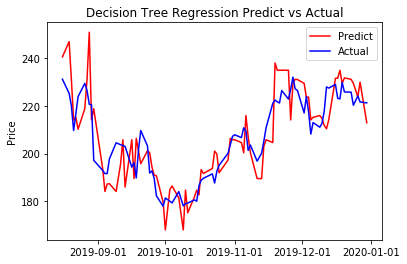

In [73]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [74]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [75]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
2156/2156 [==============================] - 1s 504us/step - loss: 145285.9648
Epoch 2/200
2156/2156 [==============================] - 1s 334us/step - loss: 142132.7882
Epoch 3/200
2156/2156 [==============================] - 1s 362us/step - loss: 133646.7775
Epoch 4/200
2156/2156 [==============================] - 1s 411us/step - loss: 120661.2350
Epoch 5/200
2156/2156 [==============================] - 1s 384us/step - loss: 105328.3765
Epoch 6/200
2156/2156 [==============================] - 1s 361us/step - loss: 89191.1997
Epoch 7/200
2156/2156 [==============================] - 1s 367us/step - loss: 73273.7563
Epoch 8/200
2156/2156 [==============================] - 1s 374us/step - loss: 58312.9110
Epoch 9/200
2156/2156 [==============================] - 1s 415us/step - loss: 44845.0706
Epoch 10/200
2156/2156 [==============================] - 1s 384us/step - loss: 33231.5074
Epoch 11/200
2156/2156 [==============================] - 1s 308us/step - loss: 23665.0247
Epo

2156/2156 [==============================] - 1s 243us/step - loss: 140.1002
Epoch 93/200
2156/2156 [==============================] - 1s 240us/step - loss: 140.0503
Epoch 94/200
2156/2156 [==============================] - 1s 254us/step - loss: 140.0015
Epoch 95/200
2156/2156 [==============================] - 1s 395us/step - loss: 139.9537
Epoch 96/200
2156/2156 [==============================] - 1s 362us/step - loss: 139.9069
Epoch 97/200
2156/2156 [==============================] - 1s 265us/step - loss: 139.8610
Epoch 98/200
2156/2156 [==============================] - 1s 301us/step - loss: 139.8159
Epoch 99/200
2156/2156 [==============================] - 1s 261us/step - loss: 139.7717
Epoch 100/200
2156/2156 [==============================] - 1s 362us/step - loss: 139.7281
Epoch 101/200
2156/2156 [==============================] - 1s 382us/step - loss: 139.6852
Epoch 102/200
2156/2156 [==============================] - 1s 261us/step - loss: 139.6429
Epoch 103/200
2156/2156 [======

2156/2156 [==============================] - 1s 408us/step - loss: 136.9324
Epoch 184/200
2156/2156 [==============================] - 1s 341us/step - loss: 136.9018
Epoch 185/200
2156/2156 [==============================] - 1s 263us/step - loss: 136.8713
Epoch 186/200
2156/2156 [==============================] - 1s 279us/step - loss: 136.8408
Epoch 187/200
2156/2156 [==============================] - 0s 224us/step - loss: 136.8103
Epoch 188/200
2156/2156 [==============================] - 1s 264us/step - loss: 136.7798
Epoch 189/200
2156/2156 [==============================] - 1s 281us/step - loss: 136.7494
Epoch 190/200
2156/2156 [==============================] - 1s 369us/step - loss: 136.7190
Epoch 191/200
2156/2156 [==============================] - 1s 402us/step - loss: 136.6884
Epoch 192/200
2156/2156 [==============================] - 1s 326us/step - loss: 136.6580
Epoch 193/200
2156/2156 [==============================] - 1s 497us/step - loss: 136.6277
Epoch 194/200
2156/2156 

In [76]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.989
The R2 score on the Test set is:	0.876


In [77]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

215/215 [==============================] - 0s 930us/step


In [78]:
print('LSTM: %f'%score_lstm)

LSTM: 55.462229


In [79]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

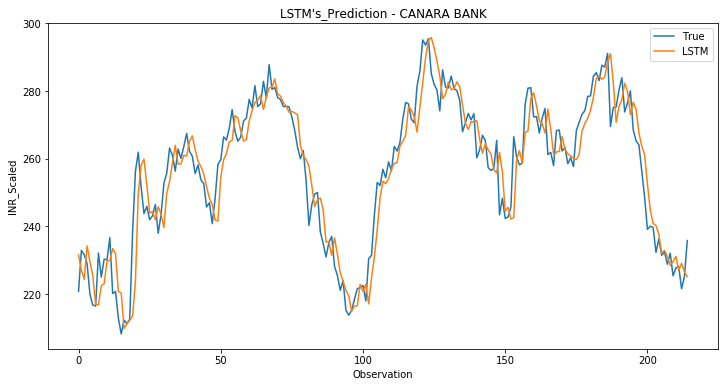

In [80]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction - CANARA BANK")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [81]:
col1 = pd.DataFrame(y_test, columns=['Actual Value'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM Prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.head(5)

,Actual Value,LSTM Prediction,Loss_LSTM
0,220.850006,231.589722,145285.964779
1,232.949997,227.099091,142132.788186
2,231.699997,224.391342,133646.777518
3,229.050003,234.246307,120661.234998
4,220.000000,229.575348,105328.376453


In [82]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_test_LSTM ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_LSTM )))

Mean Absolute Error: 5.676435106854103
Mean Squared Error: 55.46224496105878
Root Mean Squared Error: 7.447297829485455


## 4.Axis Bank

In [83]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

from sklearn import linear_model
from keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit


In [84]:
df_final = pd.read_csv("D://Dataset//AXISBANK.BO.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,199.800003,199.800003,197.600006,198.610001,133.602966,658270
2010-01-05,200.199997,203.770004,199.399994,202.000000,135.883392,1105750
2010-01-06,203.330002,204.000000,198.429993,199.059998,133.905655,815055
2010-01-07,200.000000,201.000000,197.800003,200.589996,134.934906,1123435
2010-01-08,201.800003,203.660004,199.399994,202.710007,136.360977,1219710


In [85]:
df_final.shape

(2461, 6)

In [86]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2.461000e+03
mean,414.669403,419.943853,408.655364,414.120430,386.239867,1.048775e+06
std,170.751760,172.390514,168.575296,170.371302,193.257791,6.026169e+06
min,156.539993,163.000000,152.800003,156.529999,119.157585,0.000000e+00
25%,250.259995,253.789993,246.600006,250.059998,191.134216,3.971280e+05
50%,420.549988,425.000000,415.250000,420.000000,410.714935,6.427450e+05
75%,542.000000,549.000000,534.500000,541.299988,536.142273,1.081155e+06
max,826.549988,826.549988,811.900024,821.400024,820.381287,2.634132e+08


In [87]:
df_final.isnull().values.any()

False

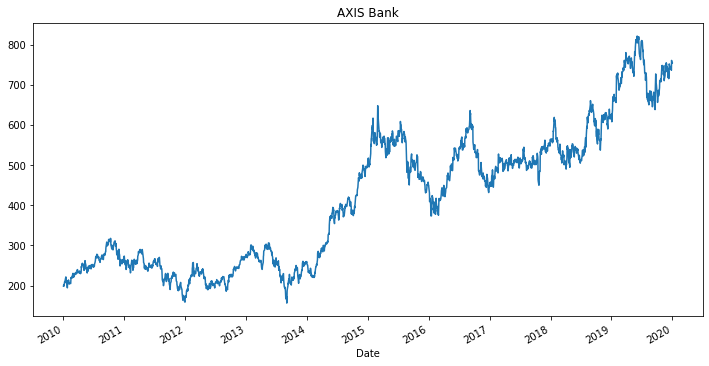

In [88]:
df_final['Close'].plot(figsize=(12,6), title = 'AXIS Bank')

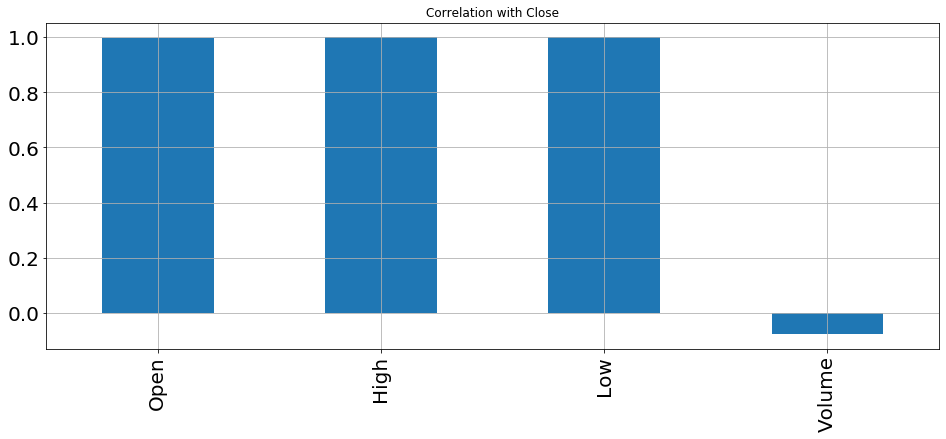

In [89]:
X=df_final.drop(['Close'],axis=1)
X=X.drop(['Adj Close'],axis=1)

X.corrwith(df_final['Close']).plot.bar(
        figsize = (16, 6), title = "Correlation with Close", fontsize = 20,
        rot = 90, grid = True)

In [90]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,199.800003,199.800003,197.600006,198.610001,133.602966,658270
2010-01-05,200.199997,203.770004,199.399994,202.000000,135.883392,1105750
2010-01-06,203.330002,204.000000,198.429993,199.059998,133.905655,815055
2010-01-07,200.000000,201.000000,197.800003,200.589996,134.934906,1123435
2010-01-08,201.800003,203.660004,199.399994,202.710007,136.360977,1219710


In [91]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-01-04,0.064566,0.055459,0.067971,0.002499
2010-01-05,0.065163,0.061442,0.070702,0.004198
2010-01-06,0.069835,0.061789,0.069231,0.003094
2010-01-07,0.064865,0.057268,0.068275,0.004265
2010-01-08,0.067551,0.061276,0.070702,0.004630


In [93]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2010-01-04,0.064566,0.055459,0.067971,0.002499
2010-01-05,0.065163,0.061442,0.070702,0.004198
2010-01-06,0.069835,0.061789,0.069231,0.003094
2010-01-07,0.064865,0.057268,0.068275,0.004265
2010-01-08,0.067551,0.061276,0.070702,0.004630


Shape of features :  (2461, 4)
Shape of target :  (2461, 1)


,Open,High,Low,Volume
Date,,,,
2019-12-23,0.872166,0.881998,0.886057,0.001224
2019-12-24,0.875300,0.876422,0.887422,0.000370
2019-12-26,0.869330,0.870243,0.881505,0.000351
2019-12-27,0.868062,0.903022,0.884995,0.001365
2019-12-30,0.900673,0.908146,0.907905,0.000845


,Close
Date,
2019-12-23,740.450012
2019-12-24,736.150024
2019-12-26,760.700012
2019-12-27,754.200012
2019-12-30,754.000000



 -----After process------ 

Shape of features :  (2371, 4)
Shape of target :  (2371, 1)


,Close
Date,
2019-08-07,660.000000
2019-08-08,660.700012
2019-08-09,650.150024
2019-08-13,663.200012
2019-08-14,675.549988


In [94]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [95]:
X_train.shape

(2156, 4)

In [96]:
X_test.shape

(215, 4)

In [97]:
y_train.shape

(2156,)

In [98]:
y_test.shape

(215,)

In [99]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  68.8585544848239
R2 score:  -2.995942000539007


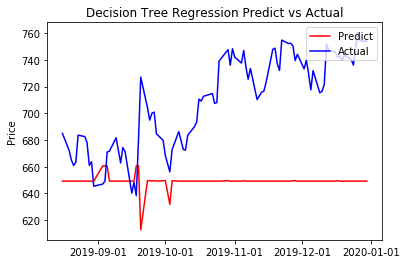

In [100]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [101]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [102]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
2156/2156 [==============================] - 1s 428us/step - loss: 158597.8396
Epoch 2/200
2156/2156 [==============================] - 1s 233us/step - loss: 156260.5751
Epoch 3/200
2156/2156 [==============================] - 0s 220us/step - loss: 151815.7915
Epoch 4/200
2156/2156 [==============================] - 1s 233us/step - loss: 145668.5240
Epoch 5/200
2156/2156 [==============================] - 1s 247us/step - loss: 138338.2793
Epoch 6/200
2156/2156 [==============================] - 1s 273us/step - loss: 130175.4166
Epoch 7/200
2156/2156 [==============================] - 1s 245us/step - loss: 121426.6719
Epoch 8/200
2156/2156 [==============================] - 1s 236us/step - loss: 112287.0441
Epoch 9/200
2156/2156 [==============================] - 1s 239us/step - loss: 102922.6753
Epoch 10/200
2156/2156 [==============================] - 1s 238us/step - loss: 93480.5716
Epoch 11/200
2156/2156 [==============================] - 0s 231us/step - loss: 84093.1682

2156/2156 [==============================] - 1s 281us/step - loss: 85.7858
Epoch 94/200
2156/2156 [==============================] - 1s 278us/step - loss: 85.6843
Epoch 95/200
2156/2156 [==============================] - 1s 307us/step - loss: 85.5849
Epoch 96/200
2156/2156 [==============================] - 1s 309us/step - loss: 85.4877
Epoch 97/200
2156/2156 [==============================] - 1s 279us/step - loss: 85.3927
Epoch 98/200
2156/2156 [==============================] - 0s 226us/step - loss: 85.2998
Epoch 99/200
2156/2156 [==============================] - 1s 280us/step - loss: 85.2091
Epoch 100/200
2156/2156 [==============================] - 1s 290us/step - loss: 85.1206
Epoch 101/200
2156/2156 [==============================] - 1s 263us/step - loss: 85.0344
Epoch 102/200
2156/2156 [==============================] - 1s 263us/step - loss: 84.9504
Epoch 103/200
2156/2156 [==============================] - 1s 276us/step - loss: 84.8686
Epoch 104/200
2156/2156 [================

2156/2156 [==============================] - 1s 328us/step - loss: 83.0455
Epoch 186/200
2156/2156 [==============================] - 1s 236us/step - loss: 83.0372
Epoch 187/200
2156/2156 [==============================] - 1s 249us/step - loss: 83.0290
Epoch 188/200
2156/2156 [==============================] - 1s 247us/step - loss: 83.0207
Epoch 189/200
2156/2156 [==============================] - 1s 255us/step - loss: 83.0125
Epoch 190/200
2156/2156 [==============================] - 1s 234us/step - loss: 83.0043
Epoch 191/200
2156/2156 [==============================] - 1s 239us/step - loss: 82.9960
Epoch 192/200
2156/2156 [==============================] - 1s 274us/step - loss: 82.9878
Epoch 193/200
2156/2156 [==============================] - 1s 243us/step - loss: 82.9796
Epoch 194/200
2156/2156 [==============================] - 1s 291us/step - loss: 82.9713
Epoch 195/200
2156/2156 [==============================] - 1s 323us/step - loss: 82.9632
Epoch 196/200
2156/2156 [==========

In [103]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.996
The R2 score on the Test set is:	0.962


In [104]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

215/215 [==============================] - 0s 1ms/step


In [105]:
print('LSTM: %f'%score_lstm)

LSTM: 214.358249


In [106]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

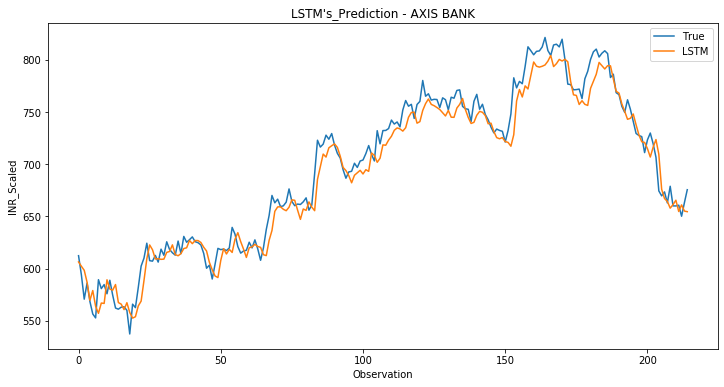

In [107]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction - AXIS BANK")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [108]:
col1 = pd.DataFrame(y_test, columns=['Actual Value'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM Prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.head(5)

,Actual Value,LSTM Prediction,Loss_LSTM
0,612.349976,606.354492,158597.839554
1,593.950012,602.208374,156260.575067
2,570.700012,598.346313,151815.791527
3,586.099976,586.916016,145668.523988
4,568.450012,569.568848,138338.279293


In [109]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_test_LSTM ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_LSTM )))

Mean Absolute Error: 11.262476437590843
Mean Squared Error: 214.35819540313167
Root Mean Squared Error: 14.640976586386978
